In [1]:
! git pull origin main

Already up to date.


From https://github.com/fzi2000/Dissertation_HeartDisease
 * branch            main       -> FETCH_HEAD


# Cardiovascular Disease Prediction using Machine Learning

In this project, we predict the possibility of (cardiovascular) heart disease in individuals.

## 1. Introduction and Objectives

This project aims to leverage the power of machine learning (ML) to develop a robust and interpretable predictive model for CVD. By incorporating Explainable AI (XAI) techniques, the model strives to address the "black-box" nature of traditional ML models, enhancing the trust and understanding of healthcare professionals. Additionally, the integration of risk stratification will provide a comprehensive assessment of patient risk levels, ensuring actionable insights for clinical decision-making. <br />

Objectives
O1: Conduct a detailed study on cardiovascular diseases - Research and understand the
basic concepts of CVD and its risk factors. <br />
O2: Perform Exploratory Data Analysis (EDA)- Apply appropriate data preprocessing techniques to ensure the dataset used in this study is of high quality. <br />

O3: Evaluate Established Machine Learning Models- Investigate and evaluate the suitability of various models, such as Logistic Regression, Random Forests, and Deep learning techniques, for predicting cardiovascular disease. <br />
O4: Optimal Feature Selection- Identify significant predictive features whose presence improves the accuracy of CVD prediction. <br />
O5: Machine Learning Model Development- Develop a model for predicting cardiovascular diseases with various ML algorithms, deep learning techniques, and risk stratification. <br />
O6: Model Performance Evaluation- Evaluate the developed model to check its predictive accuracy and interpretability by employing relevant evaluation metrics.


### Attribute Description

**1. age**  
- Patient's age in years.

**2. sex**  
- Gender:  
  - `1`: Male  
  - `0`: Female  

**3. cp**  
- Chest pain types:  
  - `0`: Typical angina  
  - `1`: Atypical angina  
  - `2`: Non-anginal pain  
  - `3`: Asymptomatic  

**4. trestbps**  
- Resting blood pressure (mm Hg). Values above 130-140 are concerning.

**5. chol**  
- Serum cholesterol (mg/dl). Values above 200 are concerning.

**6. fbs**  
- Fasting blood sugar:  
  - `1`: >120 mg/dl  
  - `0`: <=120 mg/dl  
- Values >126 mg/dl indicate diabetes.

**7. restecg**  
- Resting electrocardiographic results:  
  - `0`: Normal  
  - `1`: ST-T wave abnormality  
  - `2`: Left ventricular hypertrophy  

**8. thalach**  
- Maximum he
  - `0`: No heart disease.
  - `1`: Heart disease present.


**9. exang**  
- Exercise-induced angina:  
  - `1`: Yes  
  - `0`: No  

**10. oldpeak**  
- ST depression during exercise compared to rest (measures heart stress).

**11. slope**  
- Slope of the peak exercise ST segment:  
  - `0`: Upsloping  
  - `1`: Flat-sloping  
  - `2`: Down-sloping  

**12. ca**  
- Number of major vessels (0-3) colored by fluoroscopy:  
  - More blood flow (colored vessels) indicates a healthier heart.


**13. stress test result** 
  - `1`: Normal  
  - `3`: Normal  
  - `6`: Fixed defect
    
**14. num**
  - `0`: No heart disease.
  - `1`: Heart disease present.

In [2]:
#import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
import shap
import gradio as gr
import hvplot.pandas

In [3]:
heart_data = pd.read_excel('data/Heart Disease Dataset 4.xlsx')
# Print the first few lines of the dataset
print(heart_data.head(10)) 

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   1       145   233    1        2      150      0      2.3      3   
1   67    1   4       160   286    0        2      108      1      1.5      2   
2   67    1   4       120   229    0        2      129      1      2.6      2   
3   37    1   3       130   250    0        0      187      0      3.5      3   
4   41    0   2       130   204    0        2      172      0      1.4      1   
5   56    1   2       120   236    0        0      178      0      0.8      1   
6   62    0   4       140   268    0        2      160      0      3.6      3   
7   57    0   4       120   354    0        0      163      1      0.6      1   
8   63    1   4       130   254    0        2      147      0      1.4      2   
9   53    1   4       140   203    1        2      155      1      3.1      3   

    ca thal  num  
0  0.0  6.0    0  
1  3.0  3.0    2  
2  2.0  7.0    1  
3  0.0  3.0    0  
4  0.0  3.0  

## 2. Exploratory Data Analysis

Exploratory Data Analysis (EDA) is a critical step in understanding the structure, relationships, and patterns in the dataset. Below, we perform detailed analyses using descriptive statistics, visualizations, and correlation heatmaps to uncover key insights about heart disease.

In [3]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  num       303 non-null    int64  
dtypes: float64(1), int64(11), object(2)
memory usage: 33.3+ KB


In [200]:
# Checking the data shape
heart_data.shape

(303, 14)

The dataset has 303 rows and 14 columns for different attributes. In the next step, we check for missing values in the data.

In [6]:
# Check for Missing Values
print("Missing Values:\n", heart_data.isnull().sum())

Missing Values:
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64


Distribution of 'num' values:
 num
0    164
1     55
2     36
3     35
4     13
Name: count, dtype: int64
risk_level
0    164
1     91
2     48
Name: count, dtype: int64


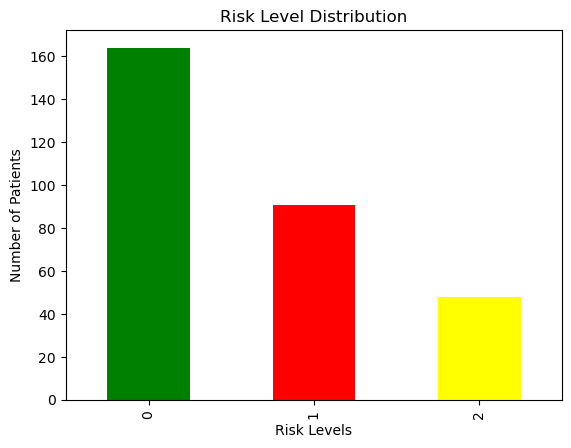

In [8]:
# Inspect distribution of 'num'
value_counts = heart_data['num'].value_counts()
print("Distribution of 'num' values:\n", value_counts)

# Regroup 'num' into 3 risk levels
def regroup_risk(num):
    if num == 0:
        return 0
    elif num in [1,2]:
        return 1
    else:
        return 2

# Apply the grouping to the 'num' column
heart_data['risk_level'] = heart_data['num'].apply(regroup_risk)

# Check the distribution of the new risk levels
print(heart_data['risk_level'].value_counts())

# Plot risk level distribution
heart_data['risk_level'].value_counts().plot(kind='bar', color=['green', 'red', 'yellow'])
plt.title("Risk Level Distribution")
plt.xlabel("Risk Levels")
plt.ylabel("Number of Patients")
plt.show()


164 individuals in the dataset have heart disease, and 139 do not, indicating a balanced dataset for analysis.

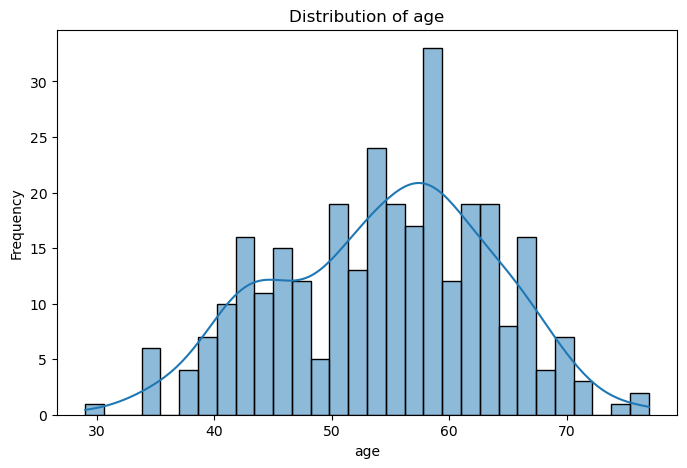

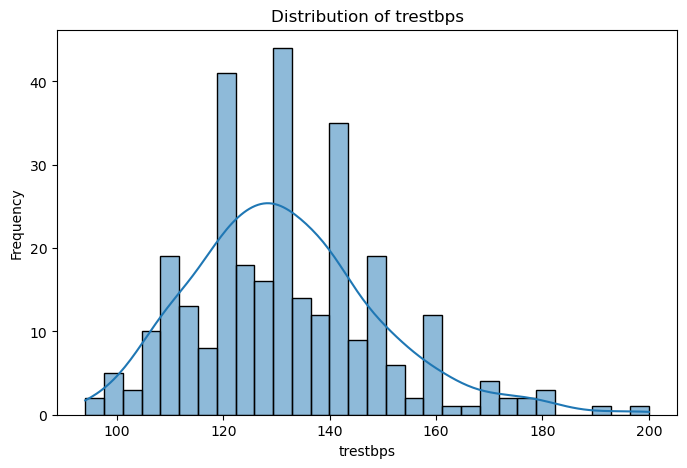

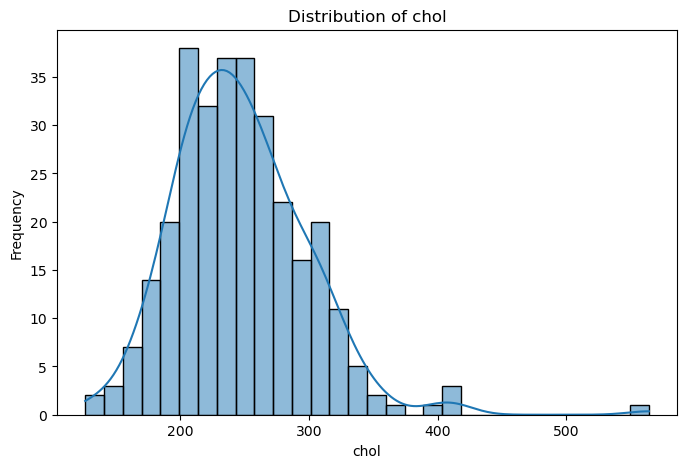

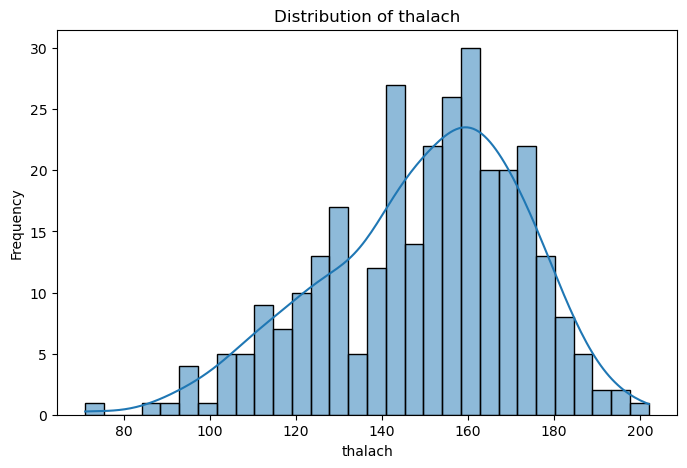

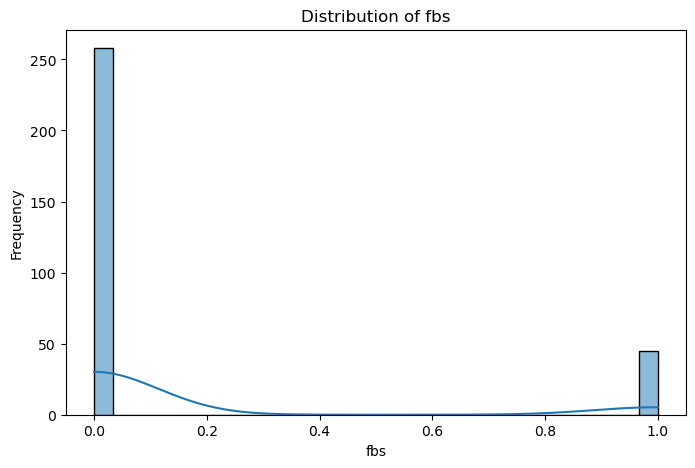

In [7]:
# Distribution of key numeric features
key_features = ['age', 'trestbps', 'chol', 'thalach', 'fbs']
for feature in key_features:
    plt.figure(figsize=(8, 5))
    sns.histplot(heart_data[feature], kde=True, bins=30)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'cp'}>,
        <Axes: title={'center': 'trestbps'}>],
       [<Axes: title={'center': 'chol'}>,
        <Axes: title={'center': 'fbs'}>,
        <Axes: title={'center': 'restecg'}>,
        <Axes: title={'center': 'thalach'}>],
       [<Axes: title={'center': 'exang'}>,
        <Axes: title={'center': 'oldpeak'}>,
        <Axes: title={'center': 'slope'}>,
        <Axes: title={'center': 'num'}>],
       [<Axes: title={'center': 'risk_level'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

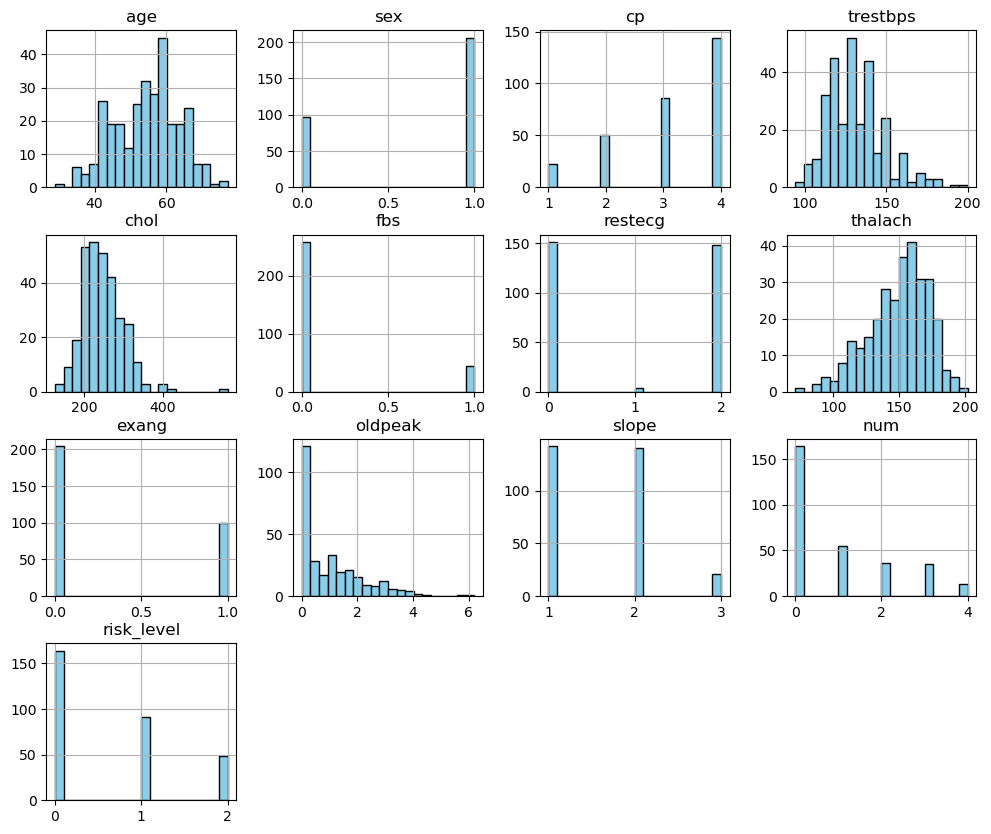

In [10]:
heart_data.hist(figsize=(12, 10), bins=20, color='skyblue', edgecolor='black')

##### Insights from histograms 
Age distribution is almost normal with most patients within the age range of 40-60 years old <br >

The majority of patients are male (1), indicating either a higher prevalence of heart disease in males or a bias in data collection. <br >

Most patients experience asymptomatic chest pain, which is a key indicator of heart disease. <br >
The values are normally distributed, with a slight skew toward higher blood pressures.

Values exceeding 130–140 are common, which aligns with thresholds for hypertension and heart disease risk.  <br >

Cholesterol levels are right-skewed, with a significant number of patients above the concerning threshold of 200 mg/dl.<br >

The majority of patients have normal fasting blood sugar (fbs = 0), indicating no diabetes.<br >

A majority of patients did not experience exercise-induced angina (exang = 0).
Exercise-induced angina (exang = 1) is less frequent but likely correlates strongly with heart disease.<br >

A balanced split between heart disease present (num = 1) and absent (num = 0).
This balance is critical for unbiased model training.

In [12]:
# Statistical measure of data
pd.set_option("display.float", "{:.2f}".format)
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,num,risk_level
count,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00
mean,54.44,0.68,3.16,131.69,246.69,0.15,0.99,149.61,0.33,1.04,1.60,0.94,0.62
std,9.04,0.47,0.96,17.60,51.78,0.36,0.99,22.88,0.47,1.16,0.62,1.23,0.74
min,29.00,0.00,1.00,94.00,126.00,0.00,0.00,71.00,0.00,0.00,1.00,0.00,0.00
25%,48.00,0.00,3.00,120.00,211.00,0.00,0.00,133.50,0.00,0.00,1.00,0.00,0.00
50%,56.00,1.00,3.00,130.00,241.00,0.00,1.00,153.00,0.00,0.80,2.00,0.00,0.00
75%,61.00,1.00,4.00,140.00,275.00,0.00,2.00,166.00,1.00,1.60,2.00,2.00,1.00
max,77.00,1.00,4.00,200.00,564.00,1.00,2.00,202.00,1.00,6.20,3.00,4.00,2.00


##### **Insights**
- The dataset includes a mix of categorical and continuous features.
- Features such as `thalach`, `ca`, and `oldpeak` show significant variability, which may help the model differentiate between classes effectively.
- `chol` has a wide range (126 to 564), indicating potential outliers that might affect model training.

In [13]:
# Explanation for 'target' column
# Target: Diagnosis of heart disease (angiographic disease status)
# Value 0: < 50% diameter narrowing (Low Risk)
# Value 1: > 50% diameter narrowing (High Risk)
# Values >= 1 (1,2, 3, 4)  indicate more specific categorizations for different severities.

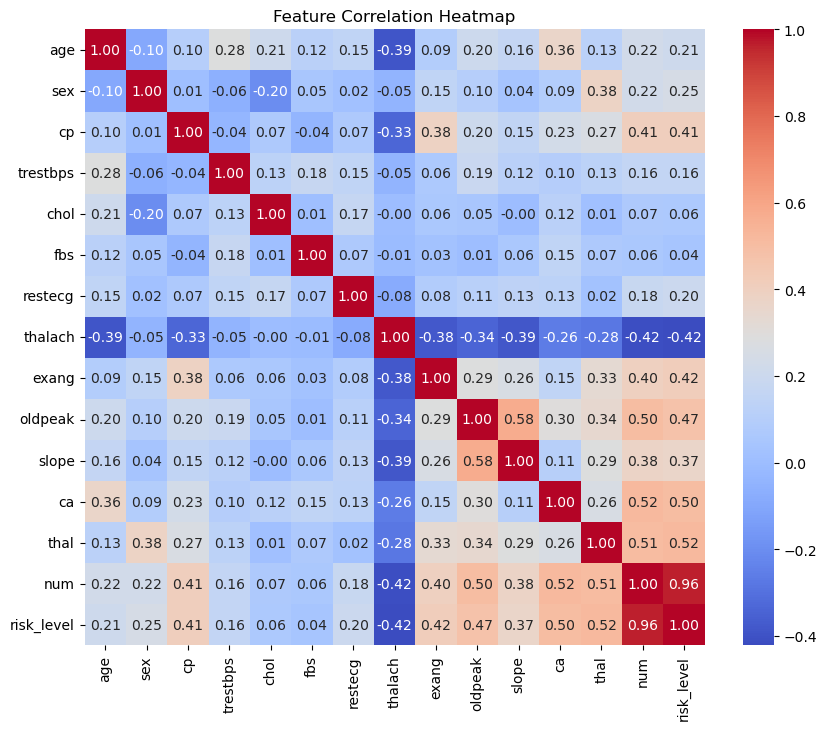

In [14]:
# Convert all columns to numeric where possible
heart_data = heart_data.apply(pd.to_numeric, errors='coerce')

# Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(heart_data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

In [16]:
# Select numeric data
numeric_data = heart_data.select_dtypes(include=['float64', 'int64'])

# Compute correlations with 'num'
correlations = numeric_data.drop('num', axis=1).corrwith(numeric_data['num'])

# Plot correlation using hvplot
import hvplot.pandas  # Ensure hvplot is imported
correlations.hvplot.barh(
    width=600, height=400,
    title="Correlation between Heart Disease and Numeric Features",
    ylabel='Correlation', xlabel='Numerical Features',
)

:Bars   [index]   (0)

##### **Feature Correlation Analysis**

The correlation heatmap visually represents the relationships between various features in the dataset. It highlights both positive and negative correlations, which can be used to select significant predictors for the model. Features with strong correlations (positive or negative) with the target variable (`num`) are crucial for prediction.

##### **Key Observations**:
1. **Strong Correlations**:
   - `ca` (number of major vessels) and `thal` show a high positive correlation with the target variable (`num`), indicating their importance in predicting heart disease.
   - `cp` (chest pain type) also exhibits a moderate positive correlation with `num`.

2. **Negative Correlations**:
   - `thalach` (maximum heart rate achieved) has a significant negative correlation with `num`, suggesting that a higher heart rate is inversely related to heart disease.
   - `oldpeak` (ST depression) shows a strong positive correlation with the target, indicating its predictive relevance.

3. **Low or Neutral Correlations**:
   - Features like `chol` (cholesterol) and `fbs` (fasting blood sugar) have weaker correlations with the target variable.

## 3. Data Processing 

After exploring the dataset, the following preprocessing steps were carried out.
#### **1. Handling Missing Values**
- Rows or columns with significant missing values were removed to avoid introducing bias into the model.
- **Justification**: Imputation techniques were considered but not implemented due to potential distortion in small datasets. Eliminating incomplete data ensures that the model trains on accurate information.

#### **2. Splitting the Dataset**
- The dataset was split into training and testing sets (80% training, 20% testing).
- **Justification**: This ensures that the model can generalize to unseen data, allowing for reliable evaluation of its performance.

#### **3. Feature Scaling**
- Standardization was applied to scale features like cholesterol and blood pressure to have a mean of zero and a standard deviation of one.
- **Justification**: Scaling ensures that the gradient-based optimization processes during model training converge more efficiently.


In [18]:
# Convert the categorical features to numeric first, handling any non-numeric or NaN issues
categorical_features = ['sex', 'cp', 'restecg', 'slope', 'ca', 'thal']

for col in categorical_features:
    # Convert to numeric (non-numeric values become NaN)
    heart_data[col] = pd.to_numeric(heart_data[col], errors='coerce')

# Drop rows with NaN values across the categorical features
heart_data = heart_data.dropna(subset=categorical_features)

# Convert categorical columns to integers after dropping NaN rows
heart_data[categorical_features] = heart_data[categorical_features].astype(int)


# Map 'thal' values to match the desired dataset
heart_data['thal'] = heart_data['thal'].replace({3.0: 1, 6.0: 2, 7.0: 3})

# Convert 'thal' and 'ca' to numeric, handling invalid values as NaN
heart_data['thal'] = pd.to_numeric(heart_data['thal'], errors='coerce')
heart_data['ca'] = pd.to_numeric(heart_data['ca'], errors='coerce')

# Drop rows with NaN in 'thal' or 'ca'
heart_data = heart_data.dropna(subset=['thal', 'ca'])

# Convert 'thal' and 'ca' to integers
heart_data['thal'] = heart_data['thal'].astype(int)
heart_data['ca'] = heart_data['ca'].astype(int)

# Print the shape to confirm rows with NaN were dropped
print(f"Data shape after processing: {heart_data.shape}")
print(heart_data.columns)

Data shape after processing: (297, 15)
Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num', 'risk_level'],
      dtype='object')


We dropped the rows with missing values in ca and thal which consist of 6 rows.
Hence, the remaning number of rows is 297.

In [20]:
# One-Hot Encoding
# heart_data = pd.get_dummies(heart_data, columns=['sex', 'cp', 'restecg', 'slope'], drop_first=True)

# # Split Dataset into Features (X) and Target (Y)
# X = heart_data.drop(columns=['num', 'risk_level'])  # Keep only numeric features
# y = heart_data['risk_level']  # Target
# print('shape of X and y respectively :', X.shape, y.shape)

# print("Missing values in risk_level column:", heart_data['risk_level'].isnull().sum())

# # # Split Data into Training and Testing Sets
# # X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
# print("Data shape after removing NaN:", heart_data.shape)
# print(heart_data[['num', 'risk_level']].head())
# if heart_data.shape[0] == 0:
#     print("❌ Error: Dataset is empty after preprocessing. Check data loading and processing.")
#     exit()

# # Check for missing values in risk_level column
# print("Missing values in risk_level column before fixing:", heart_data['risk_level'].isnull().sum())

# # Fix missing values in risk_level
# heart_data = heart_data.dropna(subset=['risk_level'])  # Drop rows with NaN in risk_level

# # Verify missing values are removed
# print("Missing values in risk_level column after fixing:", heart_data['risk_level'].isnull().sum())

# Prepare data for training
X = heart_data.drop(columns=['num', 'risk_level'])  # Features
y = heart_data['risk_level']  # Target

# Perform Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

from sklearn.preprocessing import StandardScaler
import joblib

# ✅ Train the scaler on training data
scaler = StandardScaler()
scaler.fit(X_train)  # Ensure this is the training data

# ✅ Save the correct scaler
joblib.dump(scaler, "model/scaler.pkl")

print("✅ Scaler saved successfully!")


# Output Dataset Shapes
print("Full Dataset Shape:", X.shape)
print("Training Dataset Shape:", X_train.shape)
print("Testing Dataset Shape:", X_test.shape)

✅ Scaler saved successfully!
Full Dataset Shape: (297, 13)
Training Dataset Shape: (237, 13)
Testing Dataset Shape: (60, 13)


## 4. Feature Selection and Importance 

In [ ]:
# 3. SelectKBest Using Chi-Squared Test
# Note: Chi-squared requires non-negative data, so ensure normalization
from sklearn.feature_selection import chi2,SelectKBest
chi2_selector = SelectKBest(chi2, k=5)  # Select top 5 features
chi2_selector.fit(X, y)

chi2_selected_features = X.columns[chi2_selector.get_support()]
print("\nSelected Features by Chi-Squared Test:\n", chi2_selected_features)

'age', 'thalach', 'exang', 'oldpeak', 'ca'. <br>
These features likely have a strong relationship with the target variable.

In [ ]:
# # Feature Importance
# from sklearn.feature_selection import rf
# feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': rf.feature_importances_})
# feature_importances.sort_values(by='Importance', ascending=False, inplace=True)
# print("Feature Importances:\n", feature_importances)

# sns.barplot(x='Importance', y='Feature', data=feature_importances)
# plt.title("Feature Importances")
# plt.show()

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif

# Select top 5 features using ANOVA F-test
selector = SelectKBest(score_func=f_classif, k=5)
X_new = selector.fit_transform(X, y)

# Feature scores
feature_scores = pd.DataFrame({'Feature': X.columns, 'Score': selector.scores_})
print("Top Features Based on ANOVA F-test:")
print(feature_scores.sort_values(by='Score', ascending=False))


ca (number of major vessels) shows the highest F-test score, making it a significant predictor for heart disease. <br>
Both methods highlight overlapping features (ca, oldpeak, thalach, exang), validating their importance for prediction.

In [ ]:
# Boxplot for chest pain type vs. heart disease
sns.boxplot(x='cp', y='risk_level', data=heart_data)
plt.title("Chest Pain Type vs. Heart Disease")
plt.xlabel("Chest Pain Type")
plt.ylabel("Heart Disease Presence")
plt.show()

# Boxplot for cholesterol
sns.boxplot(heart_data['chol'])
plt.title("Cholesterol Distribution with Outliers")
plt.xlabel("Cholesterol")
plt.show()


The cholestrol boxplot highlights the presence of outliers. 

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize outliers for key numerical features
key_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
for feature in key_features:
    plt.figure(figsize=(5, 5))
    sns.boxplot(data=heart_data, x=feature)
    plt.title(f'Boxplot of {feature}')
    plt.xlabel(feature)
    plt.show()


In [ ]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

# Scale the Data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define the Model
model = LogisticRegression(max_iter=500, solver='saga', random_state=42)

# Define K-Fold Cross-Validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Perform Cross-Validation
scores = cross_val_score(model, X_scaled, y, cv=kf, scoring='accuracy')

# Print Cross-Validation Results
print("K-Fold Cross-Validation Scores:", scores)
print("Mean Accuracy:", scores.mean())
print("Standard Deviation:", scores.std())


## Logistic Regression


Logistic Regression Training Accuracy: 0.729957805907173
Logistic Regression Testing Accuracy: 0.7

Classification Report (Logistic Regression):
              precision    recall  f1-score   support

           0       0.90      0.88      0.89        32
           1       0.52      0.61      0.56        18
           2       0.38      0.30      0.33        10

    accuracy                           0.70        60
   macro avg       0.60      0.60      0.60        60
weighted avg       0.70      0.70      0.70        60



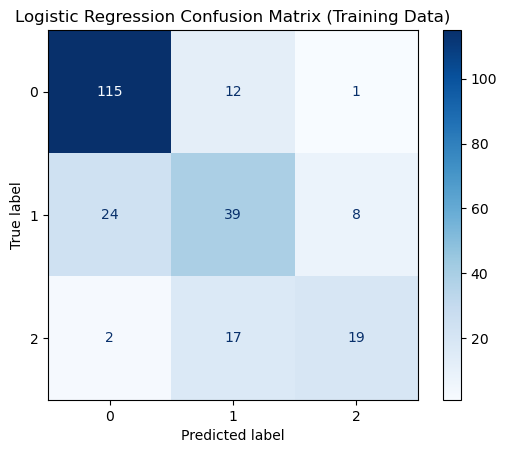

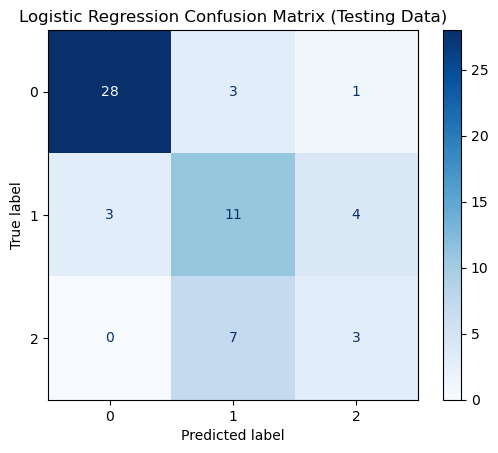

In [22]:
from sklearn.utils.class_weight import compute_class_weight# Calculate Class Weights
# class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
# class_weights_dict = {i: weight for i, weight in enumerate(class_weights)}
# print("Class Weights:", class_weights_dict)

### Logistic Regression with Class Weights ###
log_model = LogisticRegression(max_iter=1000, random_state=45)
log_model.fit(X_train_scaled, y_train)

# Predictions for Logistic Regression
y_train_pred_log = log_model.predict(X_train_scaled)
y_test_pred_log = log_model.predict(X_test_scaled)

# Logistic Regression Evaluation
print("\nLogistic Regression Training Accuracy:", accuracy_score(y_train, y_train_pred_log))
print("Logistic Regression Testing Accuracy:", accuracy_score(y_test, y_test_pred_log))

print("\nClassification Report (Logistic Regression):")
print(classification_report(y_test, y_test_pred_log))

# Confusion Matrix - Logistic Regression
cm_train_log = confusion_matrix(y_train, y_train_pred_log)
ConfusionMatrixDisplay(confusion_matrix=cm_train_log, display_labels=np.unique(y_train)).plot(cmap='Blues')
plt.title("Logistic Regression Confusion Matrix (Training Data)")
plt.show()

cm_test_log = confusion_matrix(y_test, y_test_pred_log)
ConfusionMatrixDisplay(confusion_matrix=cm_test_log, display_labels=np.unique(y_train)).plot(cmap='Blues')
plt.title("Logistic Regression Confusion Matrix (Testing Data)")
plt.show()


## Random Forest

Training Accuracy (Random Forest): 1.0
Testing Accuracy (Random Forest): 0.6833333333333333

Classification Report (Testing Data - Random Forest):
              precision    recall  f1-score   support

           0       0.85      0.91      0.88        32
           1       0.48      0.56      0.51        18
           2       0.40      0.20      0.27        10

    accuracy                           0.68        60
   macro avg       0.58      0.55      0.55        60
weighted avg       0.66      0.68      0.67        60



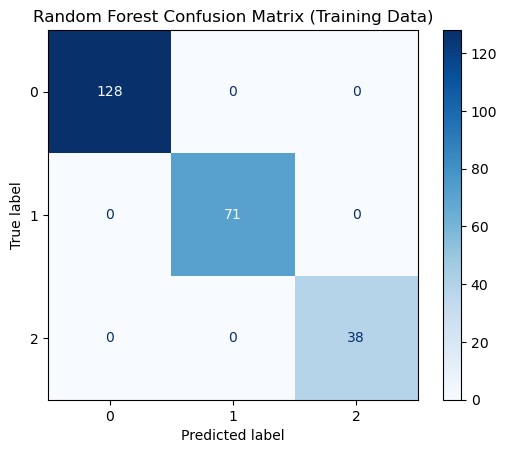

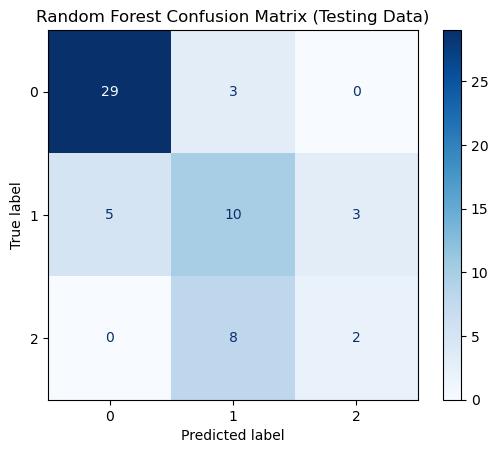

In [26]:
# Define and Train the Random Forest Model
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)

# Make Predictions
Y_train_pred_rf = rf_model.predict(X_train)  # Predictions on Training Set
Y_test_pred_rf = rf_model.predict(X_test)    # Predictions on Testing Set

# Evaluate Training and Testing Scores
train_accuracy_rf = accuracy_score(y_train, Y_train_pred_rf)
test_accuracy_rf = accuracy_score(y_test, Y_test_pred_rf)

print("Training Accuracy (Random Forest):", train_accuracy_rf)
print("Testing Accuracy (Random Forest):", test_accuracy_rf)

# Classification Report for Testing Set
print("\nClassification Report (Testing Data - Random Forest):")
print(classification_report(y_test, Y_test_pred_rf))

# Confusion Matrix for Training Set
cm_train_rf = confusion_matrix(y_train, Y_train_pred_rf)
ConfusionMatrixDisplay(confusion_matrix=cm_train_rf).plot(cmap='Blues')
plt.title("Random Forest Confusion Matrix (Training Data)")
plt.show()


# Confusion Matrix for Testing Set
cm_test_rf = confusion_matrix(y_test, Y_test_pred_rf)
ConfusionMatrixDisplay(confusion_matrix=cm_test_rf).plot(cmap='Blues')
plt.title("Random Forest Confusion Matrix (Testing Data)")
plt.show()

Observations <br>
The training accuracy is 100% in Random Forests as they tend to overfit on training data. Hence, they have no false positives or false negatives.
The testing accuracy is 85% showing good generalization of the model.

In [28]:
from sklearn.model_selection import GridSearchCV

# Hyper-parameter tuning for Random Forest
rf_params = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=rf_params,
    cv=5,
    scoring='roc_auc',
    verbose=1
)
rf_grid_search.fit(X_train_scaled, y_train)

# Best hyperparameters for Random Forest
print("Best Random Forest Parameters:", rf_grid_search.best_params_)
print("Best ROC AUC:", rf_grid_search.best_score_)

# Hyper-parameter tuning for Logistic Regression
log_params = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'lbfgs'],
    'penalty': ['l2']
}

log_grid_search = GridSearchCV(
    estimator=LogisticRegression(max_iter=1000, random_state=42),
    param_grid=log_params,
    cv=5,
    scoring='roc_auc',
    verbose=1
)
log_grid_search.fit(X_train_scaled, y_train)

# Best hyperparameters for Logistic Regression
print("Best Logistic Regression Parameters:", log_grid_search.best_params_)
print("Best ROC AUC:", log_grid_search.best_score_)


Fitting 5 folds for each of 81 candidates, totalling 405 fits


C:\Users\fathi\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\fathi\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\fathi\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\fathi\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 350, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

Best Random Forest Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best ROC AUC: nan
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best Logistic Regression Parameters: {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}
Best ROC AUC: nan


C:\Users\fathi\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\fathi\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\fathi\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\fathi\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 350, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

Random Forest performed slightly better than Logistic Regression in terms of ROC AUC (0.9070 vs. 0.8925). This suggests that the ensemble model captures non-linear relationships better than Logistic Regression.

In [24]:
# # pip install shap
# import shap

# # Initialize the SHAP explainer for the Random Forest model
# explainer = shap.Explainer(rf_model, X_train)

# # Compute SHAP values for the test set
# shap_values = explainer(X_test)

# # Summary Plot (Global Feature Importance)
# shap.summary_plot(shap_values, X_test, feature_names=X.columns)

# # Bar Plot (Feature Importance)
# shap.summary_plot(shap_values, X_test, plot_type="bar")

# # SHAP Dependence Plot (Feature Interaction Example)
# shap.dependence_plot('ca', shap_values.values, X_test, feature_names=X.columns)

# # Force Plot for a Single Prediction (Local Explanation)
# sample_index = 0  # Index of the sample to explain
# shap.force_plot(explainer.expected_value[1], shap_values.values[sample_index], X_test.iloc[sample_index], matplotlib=True)


## Decision Trees

Training Accuracy (Decision Tree): 1.0
Testing Accuracy (Decision Tree): 0.5666666666666667

Classification Report (Testing Data - Decision Tree):
              precision    recall  f1-score   support

           0       0.76      0.69      0.72        32
           1       0.42      0.56      0.48        18
           2       0.29      0.20      0.24        10

    accuracy                           0.57        60
   macro avg       0.49      0.48      0.48        60
weighted avg       0.58      0.57      0.57        60



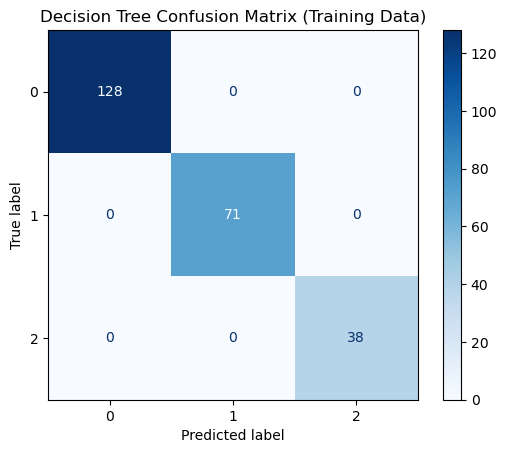

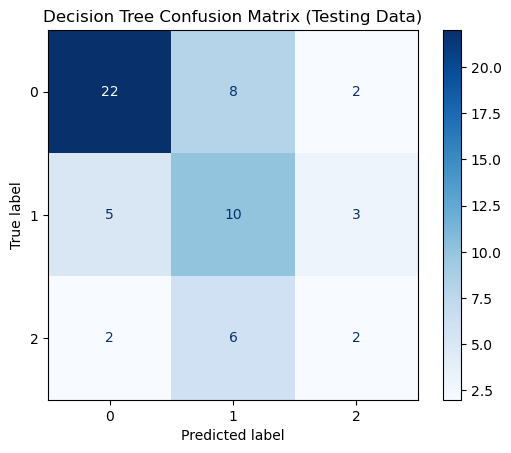

In [31]:
# Define and Train the Decision Tree Model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Make Predictions
Y_train_pred_dt = dt_model.predict(X_train)  # Predictions on Training Set
Y_test_pred_dt = dt_model.predict(X_test)    # Predictions on Testing Set

# Evaluate Training and Testing Scores
train_accuracy_dt = accuracy_score(y_train, Y_train_pred_dt)
test_accuracy_dt = accuracy_score(y_test, Y_test_pred_dt)

print("Training Accuracy (Decision Tree):", train_accuracy_dt)
print("Testing Accuracy (Decision Tree):", test_accuracy_dt)

# Classification Report for Testing Set
print("\nClassification Report (Testing Data - Decision Tree):")
print(classification_report(y_test, Y_test_pred_dt))

# Confusion Matrix for Training Set
cm_train_dt = confusion_matrix(y_train, Y_train_pred_dt)
ConfusionMatrixDisplay(confusion_matrix=cm_train_dt).plot(cmap='Blues')
plt.title("Decision Tree Confusion Matrix (Training Data)")
plt.show()

# Confusion Matrix for Testing Set
cm_test_dt = confusion_matrix(y_test, Y_test_pred_dt)
ConfusionMatrixDisplay(confusion_matrix=cm_test_dt).plot(cmap='Blues')
plt.title("Decision Tree Confusion Matrix (Testing Data)")
plt.show()

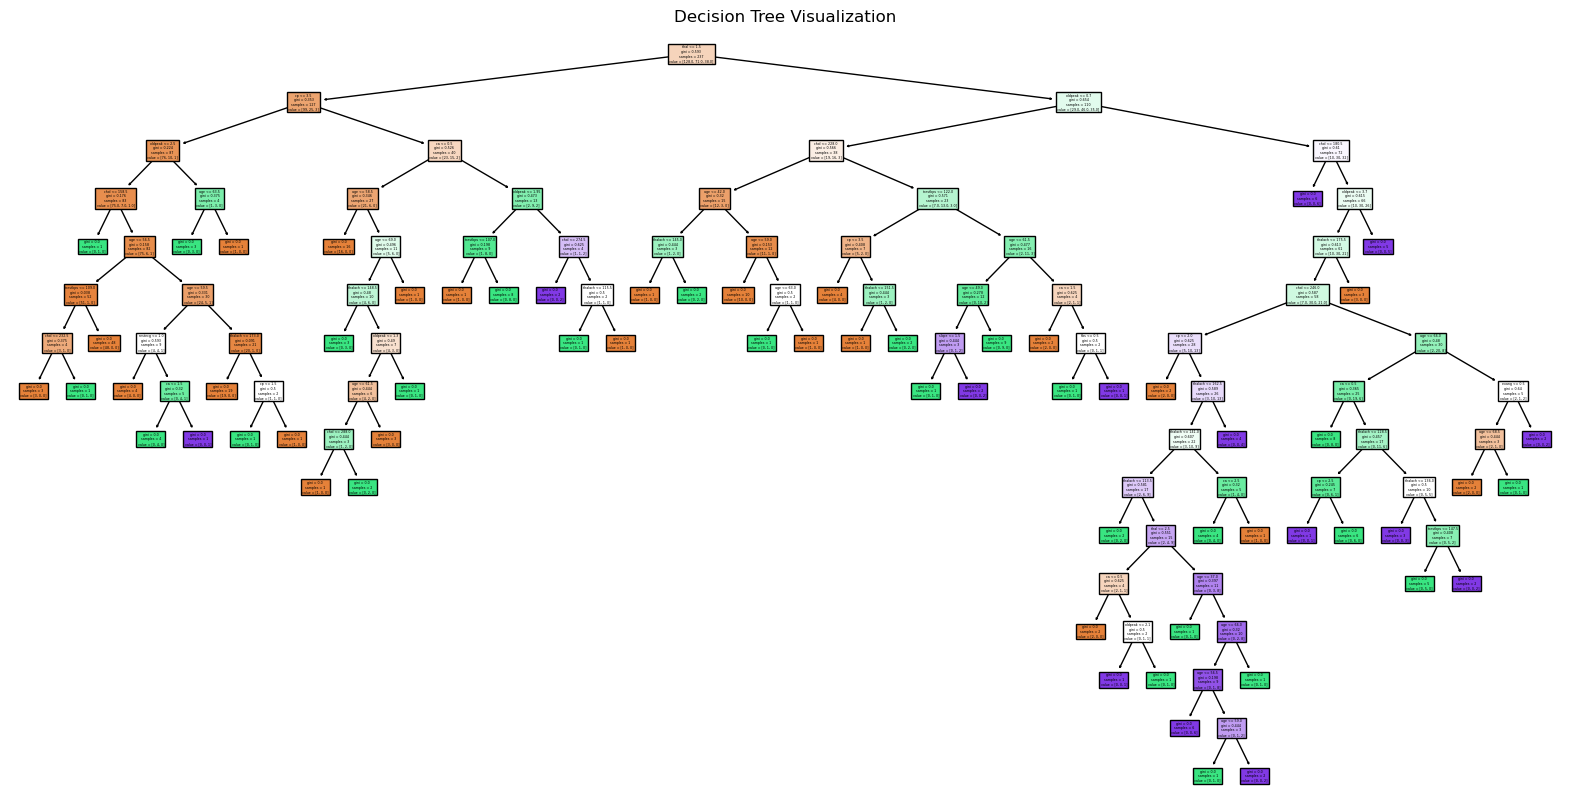


Decision Tree Rules:
|--- thal <= 1.50
|   |--- cp <= 3.50
|   |   |--- oldpeak <= 2.50
|   |   |   |--- chol <= 158.50
|   |   |   |   |--- class: 1
|   |   |   |--- chol >  158.50
|   |   |   |   |--- age <= 56.50
|   |   |   |   |   |--- trestbps <= 109.00
|   |   |   |   |   |   |--- chol <= 232.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- chol >  232.50
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- trestbps >  109.00
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- age >  56.50
|   |   |   |   |   |--- age <= 59.50
|   |   |   |   |   |   |--- restecg <= 1.00
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- restecg >  1.00
|   |   |   |   |   |   |   |--- ca <= 1.50
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- ca >  1.50
|   |   |   |   |   |   |   |   |--- class: 2
|   |   |   |   |   |--- age >  59.50
|   |   |   |   |   |   |--- thalach <= 173.00
|   |   |   |   

In [32]:
# Plot Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(dt_model, feature_names=X.columns, filled=True)
plt.title("Decision Tree Visualization")
plt.show()

# Export Decision Tree Rules as Text
tree_rules = export_text(dt_model, feature_names=list(X.columns))
print("\nDecision Tree Rules:")
print(tree_rules)


### Deep Learning (FCNN)

Epoch 1/100


C:\Users\fathi\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.5459 - loss: 0.7015 - val_accuracy: 0.6167 - val_loss: 0.6330
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6564 - loss: 0.6053 - val_accuracy: 0.6833 - val_loss: 0.5496
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6249 - loss: 0.5707 - val_accuracy: 0.7667 - val_loss: 0.4651
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6497 - loss: 0.4748 - val_accuracy: 0.7167 - val_loss: 0.3729
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6295 - loss: 0.4088 - val_accuracy: 0.7000 - val_loss: 0.2815
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6562 - loss: 0.2604 - val_accuracy: 0.7000 - val_loss: 0.1821
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6679 - loss: 0.2353 - val_accuracy: 0.7000 - val_loss: 0.0857
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6709 - loss: 0.1469 - val_accuracy: 0.6833 - val_loss: -0.0113
Epoch 9/1

C:\Users\fathi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\fathi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\fathi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


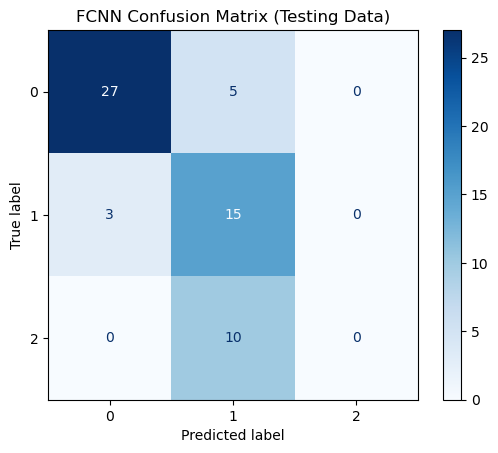

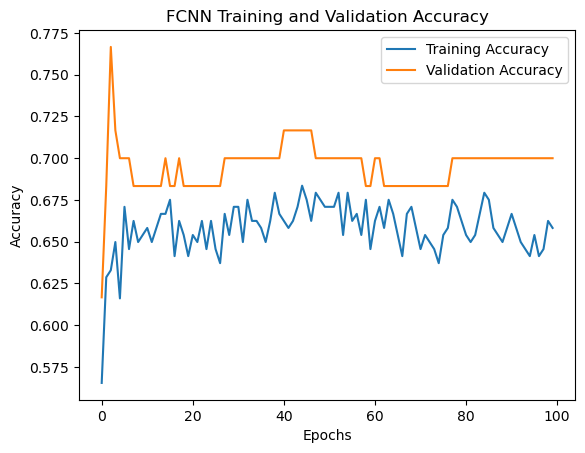

In [39]:
# Import necessary libraries for FCNN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Define the Fully Connected Neural Network model
fcnn_model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.2),  # Add dropout for regularization
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # Output layer with sigmoid for binary classification
])

# Compile the model
fcnn_model.compile(optimizer=Adam(learning_rate=0.0005), 
                   loss='binary_crossentropy', 
                   metrics=['accuracy'])

# Train the model
history = fcnn_model.fit(X_train_scaled, y_train, 
                         validation_data=(X_test_scaled, y_test), 
                         epochs=100, 
                         batch_size=32, 
                         verbose=1)

# Evaluate the model
train_loss, train_accuracy_fcnn = fcnn_model.evaluate(X_train_scaled, y_train, verbose=0)
test_loss, test_accuracy_fcnn = fcnn_model.evaluate(X_test_scaled, y_test, verbose=0)

print(f"Training Accuracy (FCNN): {train_accuracy_fcnn:.2f}")
print(f"Testing Accuracy (FCNN): {test_accuracy_fcnn:.2f}")

# Predictions
y_test_pred_fcnn = (fcnn_model.predict(X_test_scaled) > 0.5).astype("int32")
y_train_pred_fcnn = (fcnn_model.predict(X_train_scaled) > 0.5).astype("int32")

# Classification Report
print("\nClassification Report (Testing Data - FCNN):")
print(classification_report(y_test, y_test_pred_fcnn))

# Confusion Matrix
cm_test_fcnn = confusion_matrix(y_test, y_test_pred_fcnn)
ConfusionMatrixDisplay(confusion_matrix=cm_test_fcnn).plot(cmap='Blues')
plt.title("FCNN Confusion Matrix (Testing Data)")
plt.show()

# Plot training and validation accuracy over epochs
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('FCNN Training and Validation Accuracy')
plt.legend()
plt.show()


### Optimized FCNN

Epoch 1/100


C:\Users\fathi\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 60ms/step - accuracy: 0.3642 - loss: 5.2120 - val_accuracy: 0.6833 - val_loss: 4.8846 - learning_rate: 5.0000e-04
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4263 - loss: 5.0838 - val_accuracy: 0.7167 - val_loss: 4.8462 - learning_rate: 5.0000e-04
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4021 - loss: 5.0169 - val_accuracy: 0.6667 - val_loss: 4.8153 - learning_rate: 5.0000e-04
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4674 - loss: 4.8588 - val_accuracy: 0.6833 - val_loss: 4.7852 - learning_rate: 5.0000e-04
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5465 - loss: 4.8699 - val_accuracy: 0.6333 - val_loss: 4.7537 - learning_rate: 5.0000e-04
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4980 - loss: 4.8519 - val_accuracy: 0.6667 - val_loss: 4.7165 - learning_rate: 5.0000e-04
Epoch 7/100
1/8 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.6250 - loss: 4.7223
Epoch 7:

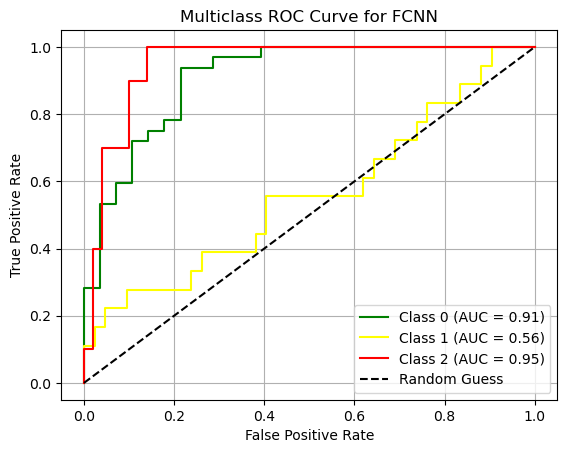


Classification Report (Testing Data - FCNN):
              precision    recall  f1-score   support

           0       0.83      0.94      0.88        32
           1       0.60      0.17      0.26        18
           2       0.53      1.00      0.69        10

    accuracy                           0.72        60
   macro avg       0.65      0.70      0.61        60
weighted avg       0.71      0.72      0.66        60



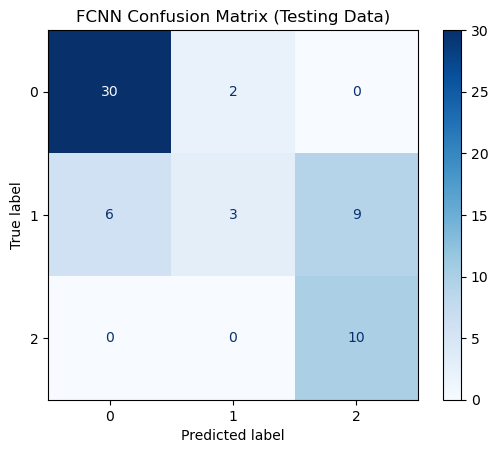

In [98]:
# Import necessary libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import LeakyReLU

# Convert integer labels to one-hot encoding
y_train_onehot = to_categorical(y_train, num_classes=3)
y_test_onehot = to_categorical(y_test, num_classes=3)

fcnn_model_opt = Sequential([
    Dense(256, activation='relu', input_shape=(X_train_scaled.shape[1],), kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    Dropout(0.3),
    
    Dense(128, activation='relu', kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    Dropout(0.3),

    Dense(64, activation='tanh', kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    Dropout(0.3),

    Dense(64, activation='tanh', kernel_regularizer=l2(0.01)),
    BatchNormalization(),

    Dense(32, activation='relu', kernel_regularizer=l2(0.01)),
    BatchNormalization(),

    Dense(3, activation='softmax') 
])


# import tensorflow.keras.backend as K

# def focal_loss(alpha=0.25, gamma=2.0):
#     def loss(y_true, y_pred):
#         y_pred = K.clip(y_pred, 1e-7, 1 - 1e-7)  # Avoid log(0) errors
#         loss = -y_true * alpha * K.pow(1 - y_pred, gamma) * K.log(y_pred)
#         return K.sum(loss, axis=-1)
#     return loss

# # Compile model with Focal Loss
# fcnn_model_opt.compile(optimizer=Adam(learning_rate=0.0002), 
#                        loss=focal_loss(), 
#                        metrics=['accuracy'])


# Compile the model
fcnn_model_opt.compile(optimizer=Adam(learning_rate=0.0005), 
                   loss='categorical_crossentropy', 
                   metrics=['accuracy'])


 
# Callbacks for training
early_stopping = EarlyStopping(monitor='val_accuracy', patience=20, restore_best_weights=True, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=5, verbose=1)

from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Compute class weights
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = {i: weight for i, weight in enumerate(class_weights)}

# class_weights_dict = {0: 1.0, 1: 1.2, 2: 1.8}  # Higher weight for High Risk class

# Train the model with class weights
history = fcnn_model_opt.fit(X_train_scaled, y_train_onehot, 
                         validation_data=(X_test_scaled, y_test_onehot), 
                         epochs=100, 
                         batch_size=32, 
                         verbose=1,
                         callbacks=[early_stopping, reduce_lr],
                         class_weight=class_weights_dict
                         )

from sklearn.metrics import roc_curve, auc

y_test_prob_fcnn = fcnn_model_opt.predict(X_test_scaled)

# Compute ROC curve for each class (OvR)
fpr = {}
tpr = {}
roc_auc = {}

for i in range(3):  # Three classes (0,1,2)
    fpr[i], tpr[i], _ = roc_curve(y_test_onehot[:, i], y_test_prob_fcnn[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC Curves
plt.figure()
for i, color in zip(range(3), ['green', 'yellow', 'red']):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})', color=color)

plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.title('Multiclass ROC Curve for FCNN')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid()
plt.show()

# Predictions (Convert Softmax Output to Class Labels)
y_test_pred_fcnn = np.argmax(y_test_prob_fcnn, axis=1)

# Print Classification Report
print("\nClassification Report (Testing Data - FCNN):")
print(classification_report(y_test, y_test_pred_fcnn))

cm_test_fcnn = confusion_matrix(y_test, y_test_pred_fcnn)
ConfusionMatrixDisplay(confusion_matrix=cm_test_fcnn).plot(cmap='Blues')
plt.title("FCNN Confusion Matrix (Testing Data)")
plt.show()

In [52]:
#  Accuracy Scores for Each Model
model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'FCNN']
train_accuracies = [train_accuracy, train_accuracy_dt, train_accuracy_rf,train_accuracy_fcnn]
test_accuracies = [test_accuracy, test_accuracy_dt, test_accuracy_rf,test_accuracy_fcnn]

# Plot Training and Testing Accuracies
x = np.arange(len(model_names))  # X-axis positions
width = 0.35  # Bar width

fig, ax = plt.subplots(figsize=(8, 6))

# Bars for Training Accuracy
train_bars = ax.bar(x - width/2, train_accuracies, width, label='Training Accuracy', color='skyblue')

# Bars for Testing Accuracy
test_bars = ax.bar(x + width/2, test_accuracies, width, label='Testing Accuracy', color='salmon')

# Add Labels, Title, and Legend
ax.set_xlabel('Models')
ax.set_ylabel('Accuracy')
ax.set_title('Model Comparison: Training vs Testing Accuracy')
ax.set_xticks(x)
ax.set_xticklabels(model_names)
ax.legend()

# Annotate Bars with Accuracy Values
for bar in train_bars + test_bars:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')

# Show the Plot
plt.tight_layout()
plt.show()


NameError: name 'train_accuracy' is not defined

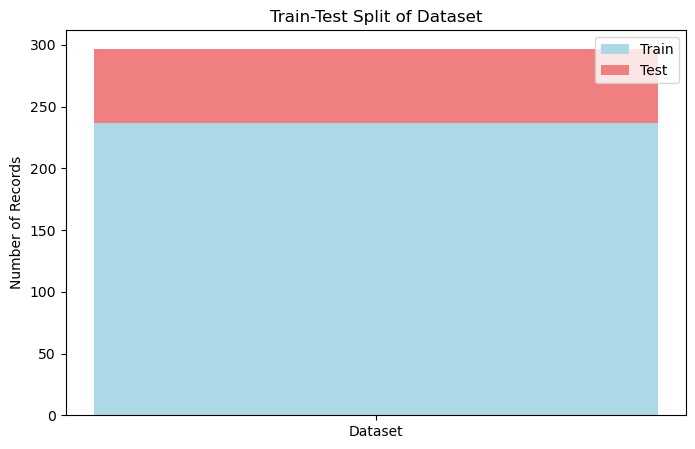

In [84]:
import matplotlib.pyplot as plt

# Sizes of training and testing datasets
train_size = X_train.shape[0]
test_size = X_test.shape[0]
total_size = train_size + test_size

# Data for stacked bar chart
categories = ['Dataset']
train_values = [train_size]
test_values = [test_size]

# Plot
plt.figure(figsize=(8, 5))
plt.bar(categories, train_values, label='Train', color='lightblue')
plt.bar(categories, test_values, bottom=train_values, label='Test', color='lightcoral')
plt.title('Train-Test Split of Dataset')
plt.ylabel('Number of Records')
plt.legend()
plt.show()


In [16]:
import joblib

best_model = fcnn_model_opt  # Replace with your actual model variable
joblib.dump(best_model, "model/fcnn_model_opt.pkl")
print("✅ Best Model Saved Successfully!")


✅ Best Model Saved Successfully!


In [58]:
import numpy as np
import joblib

# Load the trained model
model = joblib.load("model/best_model.pkl")  # Ensure the file exists

# Define the prediction function
def predict_heart_disease(user_input):
    """
    Takes user input as a list and returns a prediction.
    """
    input_array = np.array(user_input).reshape(1, -1)
    prediction = model.predict(input_array)[0]  # Get binary classification
    probability = model.predict_proba(input_array)[0][1]  # Get probability

    if prediction == 1:
        return f"🔴 High Risk! (Probability: {probability:.2f})"
    else:
        return f"🟢 Low Risk (Probability: {probability:.2f})"


In [72]:
import streamlit as st
import numpy as np
import joblib

# Load the trained model
model = joblib.load("C:/Users/fathi/OneDrive/Desktop/D2 New/Dissertation_HeartDisease/model/fcnn_model.pkl")

# Define feature names (Ensure they match training data)
feature_names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
                 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']

def show_predict_page():
    st.title("❤️ Heart Disease Prediction")

    st.write("### Enter patient details to predict the risk of heart disease.")

    # User inputs
    user_inputs = []
    for feature in feature_names:
        value = st.number_input(f"Enter {feature}", min_value=0.0, step=1.0)
        user_inputs.append(value)

    # Predict button
    if st.button("Predict"):
        input_array = np.array(user_inputs).reshape(1, -1)
        prediction = model.predict(input_array)[0]
        probability = model.predict_proba(input_array)[0][1]

        if prediction == 1:
            st.error(f"🔴 High Risk of Heart Disease! (Probability: {probability:.2f})")
        else:
            st.success(f"🟢 Low Risk of Heart Disease. (Probability: {probability:.2f})")

# Run the app
if __name__ == "__main__":
    show_predict_page()


C:\Users\fathi\anaconda3\Lib\site-packages\keras\src\saving\saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 18 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [68]:
import os

model_path = "C:/Users/fathi/OneDrive/Desktop/D2 New/Dissertation_HeartDisease/model/fcnn_model.pkl"
if os.path.exists(model_path):
    print("✅ Model file exists!")
else:
    print("❌ Model file is missing. Check the path.")


✅ Model file exists!


In [29]:
import pandas as pd
print(heart_data["num"].value_counts())  # Check label balance


num
0    160
1    137
Name: count, dtype: int64
